# TOOLS for Hologram reconstruction

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : February 8th 2021

In [252]:
import ipywidgets as widgets
import sympy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,4)

# Constants

## Hologram recording 

In [253]:
Z=200 # mm, distance between hologram and source plane

In [254]:
x_A=0 # mm, position of the source A
y_A=0 # mm, 

In [255]:
x_B=20 ## mm, position of the source B that will become the first order
y_B=0 ## mm

In [256]:
wl0=0.639e-3 ## recording wavelength in mm

In [257]:
XMIN=-40
XMAX=40
YMIN=-40
YMAX=40
NPIX=1000

## Function

In [258]:
def dd(x,y,x0,y0):
    """
    d_A(x,y,x0,y0) : distance between the point(x,y) on the hologram to the source of coordinate (x0,y0,Z)
    """
    
    dist = np.sqrt((x-x0)**2+(y-y0)**2+Z**2)
    
    return dist

In [259]:
def dd_diff(x,y):
    """
    d_ddiff(x,y) : distance difference between the two sources
    """
    dd_diff=dd(x,y,x_A,y_A)-dd(x,y,x_B,y_B)
    return dd_diff

In [260]:
def dd_phi(x,y):
    """
    dd_phase(x,y) : phase difference at point x,y on CCD
    """
    return 2*np.pi/wl0*dd_diff(x,y)

In [261]:
def interf_pattern(x,y):
    return 0.5*(np.cos(dd_phi(x,y))+1)

# plot

In [262]:
X=np.linspace(XMIN,XMAX,NPIX)

In [263]:
I0=interf_pattern(X,0)

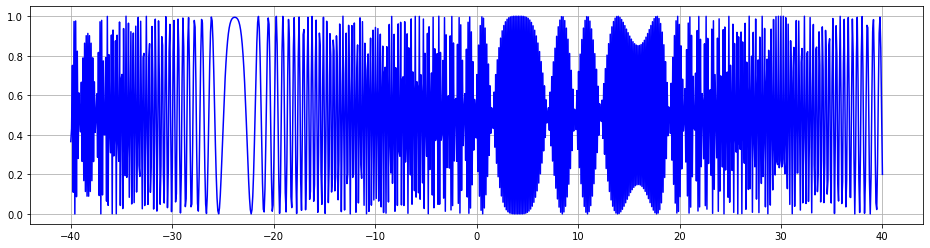

In [264]:
plt.plot(X,I0,'b-')
plt.grid()

# Mesh grid

In [265]:
X = np.linspace(XMIN, XMAX, NPIX)

Y = np.linspace(YMIN, YMAX, NPIX)

XX, YY = np.meshgrid(X, Y, sparse=True)

In [266]:
I1=dd_phi(XX,YY)
I2=interf_pattern(XX,YY)

<ipython-input-267-d294693b2037>:4: UserWarning: The following kwargs were not used by contour: 'color'
  h1 = plt.contour(X,Y,ZZ,levels=100,color="k")


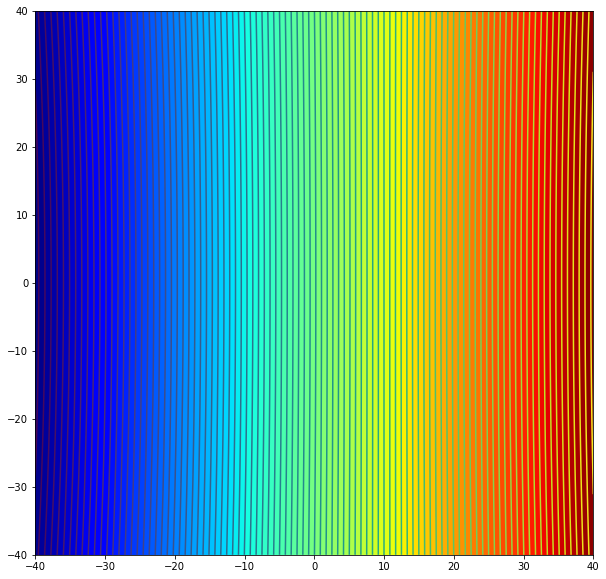

In [267]:
plt.figure(figsize=(10,10))
ZZ = I1
h = plt.contourf(X,Y,ZZ,levels=100,cmap="jet")
h1 = plt.contour(X,Y,ZZ,levels=100,color="k")
plt.show()

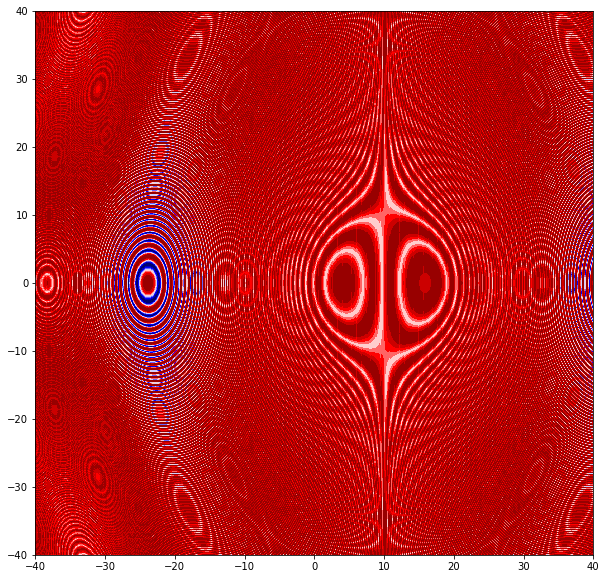

In [268]:
plt.figure(figsize=(10,10))
ZZ = I2
h = plt.contourf(X,Y,ZZ,levels=10,cmap="seismic")
plt.show()

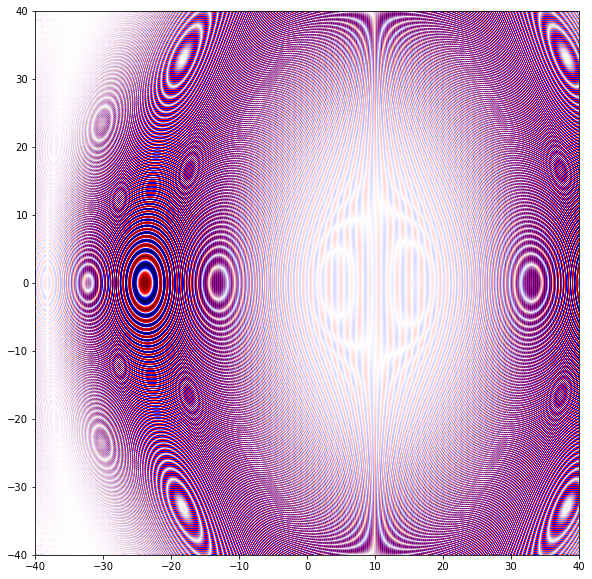

In [269]:
plt.figure(figsize=(10,10))
plt.imshow(I2,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))

In [270]:
V,U=np.gradient(I1)

In [271]:
Norm=np.sqrt(U**2+V**2)
U=U/Norm
V=V/Norm

In [272]:
eps=1e-12
V=np.where(np.abs(V)<eps,eps,V)
U=np.where(np.abs(U)<eps,eps,U)
tanAngle=-  V/U
Angle=- 180/np.pi*np.arctan(V/U)

Text(0.5, 1.0, 'tangent Angle')

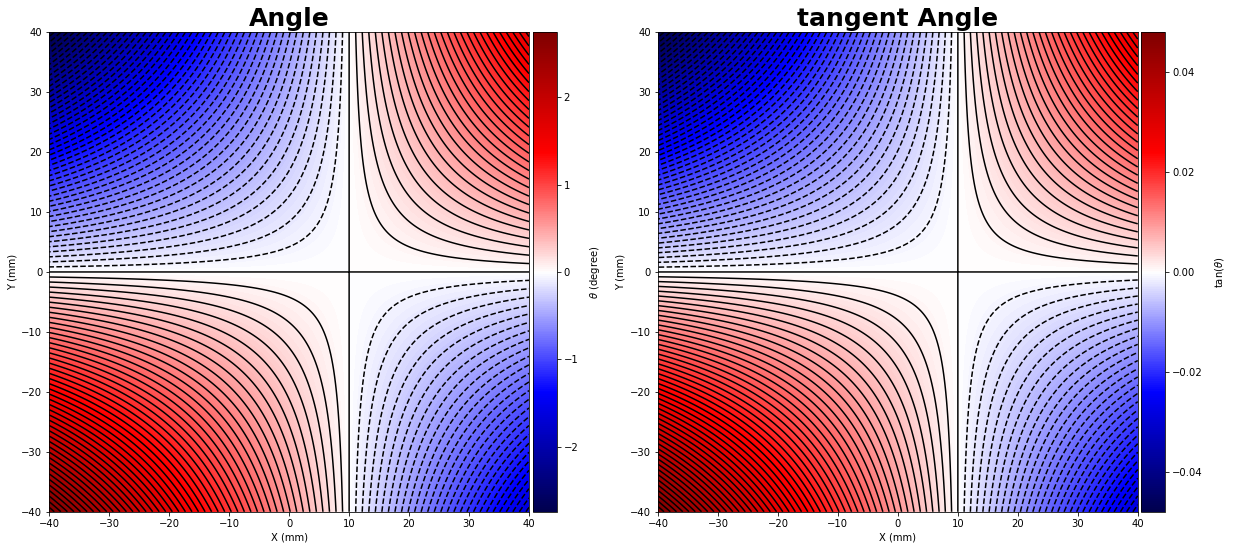

In [284]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Angle,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Angle,levels=100,colors='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("Angle",fontweight="bold",fontsize=25)

ax2 = fig.add_subplot(122)
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)


im2=ax2.imshow(tanAngle,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h2 = ax2.contour(X,Y,tanAngle,levels=100,colors='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\tan(\\theta)$', rotation=90)

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("tangent Angle",fontweight="bold",fontsize=25)


# Analytical functions

In [274]:
def z_angle(x,y):
    return -180./np.pi*np.arctan(delta*y*(delta-2*x)/8/delta/Z**2)

In [275]:
def z_angleall(x,y):
    
    dA=dd(x,y,x_A,y_A)
    dB=dd(x,y,x_B,y_B)
    
    DxDy=(dB*(y-y_A)-dA*(y-y_B))/(dB*(x-x_A)-dA*(x-x_B))
    return -180./np.pi*np.arctan(DxDy)

In [276]:
Z_Ang=z_angle(XX, YY)
Z_Angall=z_angleall(XX, YY)

<ipython-input-277-da5f8eb5c0d7>:9: UserWarning: The following kwargs were not used by contour: 'linecolor'
  h1 = ax1.contour(X,Y,Z_Ang,levels=100,linecolor='k')
<ipython-input-277-da5f8eb5c0d7>:27: UserWarning: The following kwargs were not used by contour: 'linecolor'
  h2 = ax2.contour(X,Y,Z_Angall,levels=100,linecolor='k')


Text(0.5, 1.0, 'theoretical Angle (full formula)')

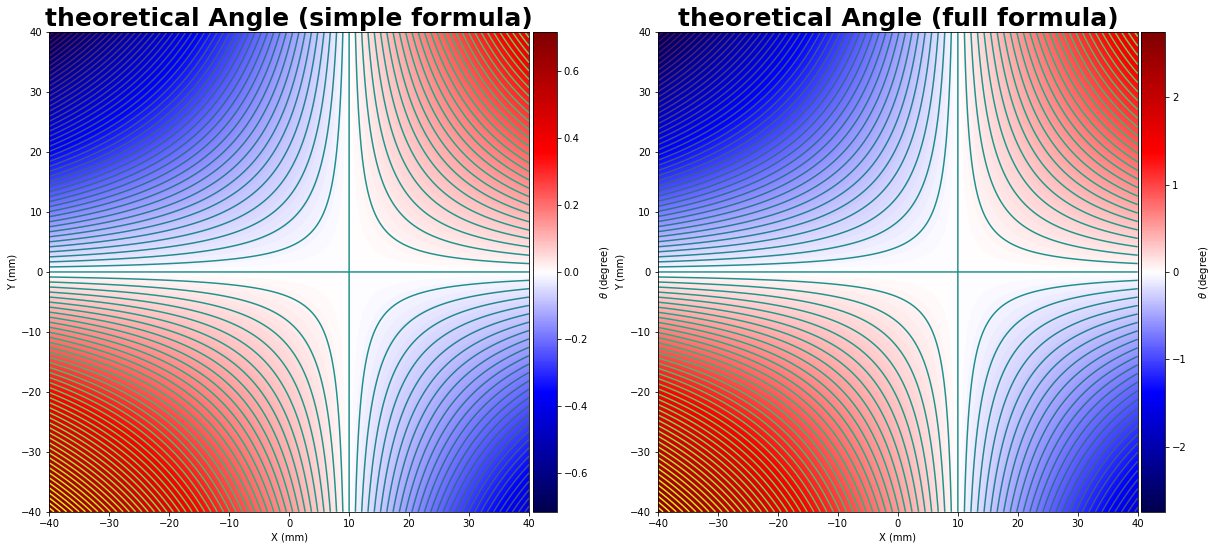

In [277]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Z_Ang,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Z_Ang,levels=100,linecolor='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("theoretical Angle (simple formula)",fontweight="bold",fontsize=25)


ax2 = fig.add_subplot(122)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)


im2=ax2.imshow(Z_Angall,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h2 = ax2.contour(X,Y,Z_Angall,levels=100,linecolor='k')
cbar2=fig.colorbar(im2,cax=cax2)

cbar2.ax.get_yaxis().labelpad = 10
cbar2.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

ax2.set_xlabel("X (mm)")
ax2.set_ylabel("Y (mm)")
ax2.set_title("theoretical Angle (full formula)",fontweight="bold",fontsize=25)



# likelihood

In [278]:
NumberofPoints=500

In [279]:
Nxsim=np.random.randint(NPIX, size=(NumberofPoints))
Nysim=np.random.randint(NPIX, size=(NumberofPoints))

<ipython-input-280-255cb06a32e0>:9: UserWarning: The following kwargs were not used by contour: 'linecolor'
  h1 = ax1.contour(X,Y,Angle,levels=100,linecolor='k')


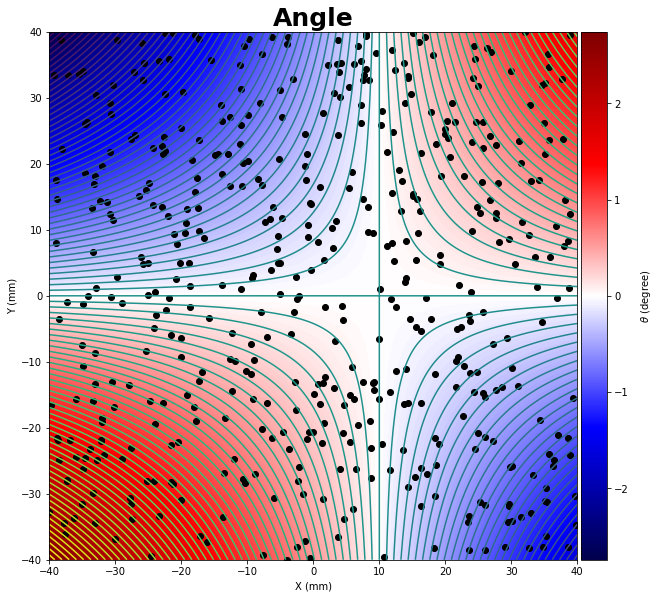

In [280]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(Angle,origin="lower",cmap="seismic",extent=(XMIN,XMAX,YMIN,YMAX))
h1 = ax1.contour(X,Y,Angle,levels=100,linecolor='k')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\theta$ (degree)', rotation=90)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("Angle",fontweight="bold",fontsize=25)

ax1.scatter(X[Nxsim],Y[Nysim],marker="o",color="k")

In [281]:
def lnlikelihood(Xdata,Ydata):
    """
    """
    
    chi2=0
    N=len(Xdata)
    chi2=np.zeros((NPIX,NPIX))
    deltax=x_B-x_A
    deltay=y_B-y_A
    
    for idx in np.arange(N):
        
        dA=dd(Xdata[idx],Ydata[idx],XX-deltax/2,YY-deltay/2)
        dB=dd(Xdata[idx],Ydata[idx],XX+deltax/2,YY+deltay/2)
    
        DxDy=(dB*(Ydata[idx]-(YY-deltay/2))-dA*(Ydata[idx]-(YY+deltay/2)))/(dB*(Xdata[idx]-(XX-deltax/2))-dA*(Xdata[idx]-(XX+deltax/2)))
        
        angle_mod = -180./np.pi*np.arctan(DxDy)
        
        angle_mes=z_angleall(Xdata[idx],Ydata[idx])
    
        chi2+=(angle_mod-angle_mes)**2
        
    return chi2
    
    

In [282]:
chi2=lnlikelihood(X[Nxsim],Y[Nysim])

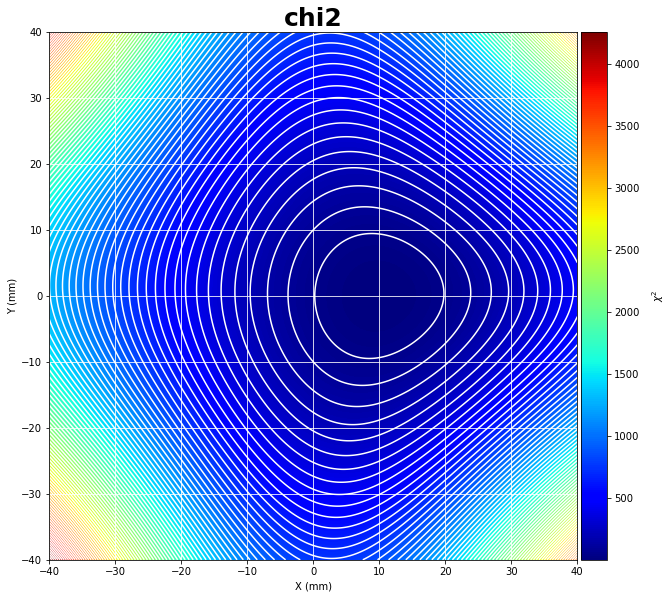

In [283]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes('right', size='5%', pad=0.05)


im1=ax1.imshow(chi2,origin="lower",cmap="jet",extent=(XMIN,XMAX,YMIN,YMAX))

h1 = ax1.contour(X,Y,chi2,levels=100,colors='w')
cbar1=fig.colorbar(im1,cax=cax1)

cbar1.ax.get_yaxis().labelpad = 10
cbar1.ax.set_ylabel('$\\chi^2$', rotation=90)

ax1.set_xlabel("X (mm)")
ax1.set_ylabel("Y (mm)")
ax1.set_title("chi2",fontweight="bold",fontsize=25)

ax1.grid(color="w")